<a href="https://colab.research.google.com/github/Robots-Vision/KNNExamples/blob/master/src/KNNWines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
# Carregando conjunto de dados do sklearn
wine = datasets.load_wine()

In [4]:
# Criando o DataFrame, para facilitar as nossas análises
#  pandas.DataFrame(data=None, index: Optional[Collection] = None, columns: Optional[Collection] = None, dtype: Optional[Union[str, numpy.dtype, ExtensionDtype]] = None, copy: bool = False)
df_wine = pd.DataFrame(data = wine.data, columns=wine.feature_names)

In [5]:
# Criando a coluna com os valores da variável target.
df_wine['class'] = wine.target

In [6]:
# Verificando as 4 primeiras linhas do DataFrame
# Para melhorar a visualização usei o parâmetro T de transposição, ele basicamente transforma as colunas em linhas.
df_wine.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### **O tipo de dado dos atributos é float64, com exceção da classe, e não temos nenhum valor nulo nesse conjunto de dados.**

In [9]:
# Qual é a quantidade de amostras pro classe?
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

### Temos 71 amostras da classe 1, 59 da classe 0 e 48 da classe 2.

In [10]:
# Separando os dados de treino e teste:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class', axis=1), df_wine['class'], test_size=0.3)

In [11]:
# Instanciando o Classificador:
from sklearn.neighbors import KNeighborsClassifier

# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
# Aplicando nossos dados de treino no algoritmo KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
# Executando o KNN com o conjunto de teste.
# Usamos o método predict() para prever os valores para os dados de teste.
resultado = knn.predict(X_test)
resultado

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 2])

In [16]:
# Analisando e validando os resultados obtidos
# A matriz de confusão é uma tabela que mostra as frequências classificação para cada classe do modelo.
print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames = ['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        16   0   1   17
1         4   7   8   19
2         5   3  10   18
All      25  10  19   54


Por exemplo, dos 17 valores que o modelo previu como sendo da classe 0, 16 elementos foram classificados corretamente e 1 foi classificado como sendo da classe 2, ou seja, nesse caso o modelo errou.

In [17]:
# Métricas de classificação
from sklearn import metrics
print(metrics.classification_report(y_test, resultado, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.64      0.94      0.76        17
     class_1       0.70      0.37      0.48        19
     class_2       0.53      0.56      0.54        18

    accuracy                           0.61        54
   macro avg       0.62      0.62      0.60        54
weighted avg       0.62      0.61      0.59        54



In [18]:
# Vamos gerar uma lista com valores de 1 a 30 para testar qual será o melhor valor para o parâmetro K.
from sklearn.model_selection import GridSearchCV

# Definindo a lista de valores.
k_list = list(range(1,31))

# Colocamos os valores em um dicionário
parametros = dict(n_neighbors=k_list)

In [19]:
# Instanciando o objeto GridSearch
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

No código acima passamos o nosso modelo, a lista com os valores para o número de vizinhos, cv (número de dobras para a validação cruzada) e o scoring que é uma das métricas de avaliação dos modelos de classificação.

Visite a documentação do Sklearn https://scikit-learn.org/stable/modules/cross_validation.html para mais detalhes sobre a validação cruzada.

In [20]:
# Treinando o objeto
grid.fit(df_wine.drop('class', axis=1), df_wine['class'] )

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [21]:
# Mais afinal qual é o melhor valor para o parâmetro K?
print("Melhores parametros {} com o valor de acurácia {}".format(grid.best_params_, grid.best_score))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651


In [ ]:
# Visualização de forma gráfica
plt.figure(figsize=(10,6))
plt.plot(k_list, grid.score, color='red', linestyle='dashed', marker='o')

In [29]:
# Visualizando as fronteiras de complexidade
X = wine.data[:, [0,2]]
y = wine.target

In [36]:
def plot_fronteiras(n_vizinhos):
  knn = KNeighborsClassifier(n_neighbors = n_vizinhos )
  knn.fit(X, y)
  plt.figure(figsize=(8,5))
  plot_decision_regions(X, y, clf = knn, legend=2)
  plt.xlabel('alcohol')
  plt.ylabel('malic_acid')
  plt.title('Fronteiras de Complexidade - KNN')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


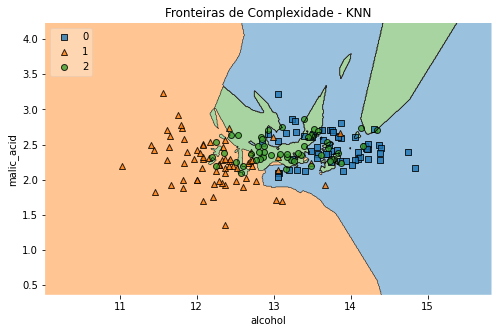

In [37]:
plot_fronteiras(3)

### Em azul temos a classe 0, em laranja a classe 1 e em verde a classe 2.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


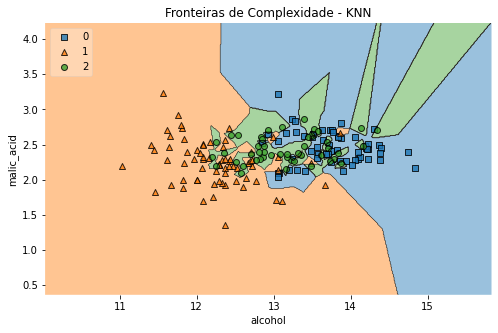

In [38]:
plot_fronteiras(1)

### Como podemos ver para K=1 as regiões são bem mais delimitadas.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


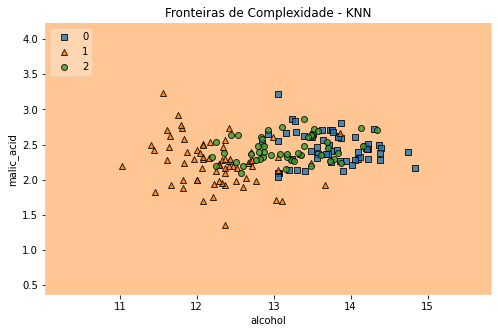

In [39]:
# Valor de K = número total de amostras
plot_fronteiras(df_wine.shape[0])

### Nesse caso, não existe fronteiras definidas, ou seja, todas as amostras serão classificadas como sendo da classe 1 que é a classe que possui um número maior de amostras.

E para finalizar e importante deixar claro que se seu conjunto de dados possuir dados categóricos, eles precisam ser transformados em números, já que o KNN utiliza medidas de distância pra fazer a comparação dos registros, uma das formas de fazer isso é utilizando o One Hot Encoder.